# Proyek Analisis Data: Bike Sharing Dataset
- Nama              : Yudha Saputra
- Email             : yyudhasaputra@gmail.com
- Username Dicoding : yudhasaputra

## Menentukan Pertanyaan Analisis Data Pada Bisnis

- Musim dan cuaca apa yang paling banyak terjadinya peminjaman?
- Apakah pada hari libur bisa mempengaruhi perbandingan jumlah peminjam antara casual dengan registered?

## Mempersiapkan semua library yang dibutuhkan

In [2]:
import numpy as np 
import scipy as sp 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Pada proses pertama kita akan memasukan data ke dalam notebook, karena data sudah tersedia dalam format CSV, kita dapat memanggilnya dengan demikian:

In [3]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

Tertulis bahwa day_df merupakan dataset yang dicatat per harinya, sedangkan hour_df dicatat setiap jam. Keduanya hanya memiliki perbedaan kolom 'hr' atau jam pada hour_df. Kita tidak perlu melakukan proses join ataupun lainnya pada dataset karena sudah sesuai.

### Assessing Data

Pertama kita akan coba menggunakan ```info{}``` dan ```describe{}``` untuk mengamati dataset yang dimiliki.

In [4]:
day_df.info()
day_df.describe()
hour_df.info()
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Data ``day.csv`` tidak masuk akal, tidak mungkin dalam 1 tanggal yang sama didefinisikan sebagai hari yang berbeda (weekday berbeda), yang juga memiliki working day yang berbeda. Dalam proses analisis akan menggunakan ``hour.csv``, namun ``day.csv`` masih akan digunakan dalam menjawab pertanyaan kedua dengan mengabaikan kesalahan input pada weekday dan menganggapnya sebagai satu data agregat per hari.

In [6]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


Terlihat bahwa tidak ada permasalahan pada dataset. Tidak terdeteksinya ada null-value pada seluruh kolom (dilihat dari ```non null count``` yang sama dengan ```range index```), dan juga nilai ```min``` dan ```max``` sesuai dengan keterangan pada ```Readme.txt``` pada folder dataset.

Terkait dua pertanyaan bisnis sebelumnya, kita akan memerlukan beberapa data yang diambil dari dataset ini, yaitu:
- ```season```
- ```weathersit```
- ```workingday```
- ```cnt```
- ```casual```
- ```registered```

Selain itu untuk mempermudah analisis, kita akan merubah juga date day dan hour menjadi timestamp.

In [7]:
# Gabungkan dteday dengan hr
# Konversi hr ke string
hour_df['hr'] = hour_df['hr'].astype(str)

# Menggabungkan keduanya sebagai datetime
hour_df['timestamp'] = pd.to_datetime(hour_df['dteday'] + ' ' + hour_df['hr'].str.zfill(2), format='%Y-%m-%d %H')

# Konversi data dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(hour_df['dteday'], format='%Y-%m-%d')

# Mengurutkan kembali hasil konversi
hour_df = hour_df.sort_values('timestamp')
print(hour_df['timestamp'])
print(day_df['dteday'])

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
17374   2012-12-31 19:00:00
17375   2012-12-31 20:00:00
17376   2012-12-31 21:00:00
17377   2012-12-31 22:00:00
17378   2012-12-31 23:00:00
Name: timestamp, Length: 17379, dtype: datetime64[ns]
0     2011-01-01
1     2011-01-01
2     2011-01-01
3     2011-01-01
4     2011-01-01
         ...    
726   2011-02-02
727   2011-02-02
728   2011-02-02
729   2011-02-02
730   2011-02-02
Name: dteday, Length: 731, dtype: datetime64[ns]


### Cleaning Data

Pada tahap sebelumnya tidak terdeteksi adanya kesalahan pada dataset, terutama tipe data. Pada bagian ini kita akan menggunakan ```dropna``` untuk menemukan nilai kosong yang ada pada data.

In [8]:
day_df = day_df.dropna()
hour_df = hour_df.dropna()

## Exploratory Data Analysis (EDA)

### Explorasi musim, cuaca, dan jumlah peminjam

Data yang diambil merupakan data dari luar negeri, dimana terdapat empat musim dengan cuaca yang berbeda-beda. Hal ini memiliki kemungkinan besar memberikan dampak pada jumlah peminjam sepeda.
Hipotesis yang dapat dibuat adalah:

**Musim dan cuaca memiliki korelasi terhadap jumlah peminjam.**

Hal ini diambil dari kenyamanan ketika menggunakan sepeda. Ketika musim dingin atau musim panas, menggunakan sepeda merupakan hal yang tidak nyaman. Begitu juga cuaca seperti hujan yang cukup membahayakan pengendara.

Berikut adalah kode untuk mengambil hanya komponen yang dibutuhkan saja.
Kita akan mengujinya menggunakan dua data, yaitu per jam dengan ```hour_df``` dan per
hari dengan ```day_df```.

#### Per Jam

In [9]:
# Memeriksa jumlah pengendara per jam
casual_hr = hour_df['casual']
registered_hr = hour_df['registered']
total_ride_hr = hour_df['cnt']
print(total_ride_hr)

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64


In [10]:
# Kita akan memeriksa rata-rata per musim
# Menyatukan terlebih dahulu data diatas menjadi satu dataframe
# Memasukan juga data season dan weathersit
zipped_data = list(zip(hour_df['season'],hour_df['weathersit'],casual_hr,registered_hr,total_ride_hr))
ride_hr_df = pd.DataFrame(zipped_data, columns=['season','weather','casual','registered','total'])
print(ride_hr_df)

       season  weather  casual  registered  total
0           1        1       3          13     16
1           1        1       8          32     40
2           1        1       5          27     32
3           1        1       3          10     13
4           1        1       0           1      1
...       ...      ...     ...         ...    ...
17374       1        2      11         108    119
17375       1        2       8          81     89
17376       1        1       7          83     90
17377       1        1      13          48     61
17378       1        1      12          37     49

[17379 rows x 5 columns]


In [11]:
# Menggunakan metode groupby
ride_hr_df.groupby(by='season').agg({
    'casual': ['mean','max','min'],
    'registered': ['mean','max','min'],
    'total': ['mean','max','min'],
})

casual           registered                total         
             mean  max min        mean  max min        mean  max min
season                                                              
1       14.290901  367   0   96.823668  681   0  111.114569  801   1
2       46.160581  361   0  162.183488  782   0  208.344069  957   1
3       50.287144  350   0  185.729093  886   0  236.016237  977   1
4       30.666824  362   0  168.202032  876   0  198.868856  967   1

Terlihat pada data diatas, secara rata-rata pengguna registered setiap musimnya per jam lebih banyak menggunakan sepeda ketimbang pengguna casual. Terlihat juga jumlah rata-rata terbanyak terdapat pada musim gugur (fall), dan paling sedikit pada musim semi (spring).

In [12]:
# Menggunakan metode groupby
ride_hr_df.groupby(by='weather').agg({
    'casual': ['mean','max','min'],
    'registered': ['mean','max','min'],
    'total': ['mean','max','min'],
})

casual           registered                total         
              mean  max min        mean  max min        mean  max min
weather                                                              
1        40.545431  367   0  164.323841  886   0  204.869272  977   1
2        29.595290  350   0  145.570202  822   0  175.165493  957   1
3        16.055673  263   0   95.523608  791   0  111.579281  891   1
4         2.666667    6   1   71.666667  158  22   74.333333  164  23

Jika berdasarkan cuaca, terlihat bahwa pengguna paling banyak per jam adalah ketika kondisi cuaca cerah atau sedikit berawan (pada nomor 1), dan paling sedikit pada hujan (besar maupun kecil), es, badai, serta sangat berawan (pada nomor 4)

In [13]:
# Menggunakan metode groupby
grouped_weather_season_hr = ride_hr_df.groupby(by=['season','weather']).agg({
    'casual': ['mean','max','min'],
    'registered': ['mean','max','min'],
    'total': ['mean','max','min']
})
print(grouped_weather_season_hr)

                   casual           registered                total         
                     mean  max min        mean  max min        mean  max min
season weather                                                              
1      1        16.683677  367   0  105.371857  681   0  122.055535  801   1
       2        12.248963  226   0   90.825726  623   0  103.074689  712   1
       3         3.772358   31   0   54.878049  505   0   58.650407  520   1
       4         2.666667    6   1   71.666667  158  22   74.333333  164  23
2      1        52.884575  361   0  179.526408  782   0  232.410983  873   1
       2        39.258741  311   0  142.002622  726   0  181.261364  957   1
       3        18.258621  241   0   96.921182  688   0  115.179803  782   1
3      1        53.053049  327   0  191.441159  886   0  244.494207  977   1
       2        44.720169  350   0  180.128828  751   1  224.848997  868   2
       3        36.159851  263   0  135.795539  786   0  171.955390  891   1

Setelah dikombinasikan antara musin dan cuaca, terlihat bahwa rata-rata terbanyak pengguna per jam adalah ketika musim gugur, dengan cuaca berawan. Terlihat juga bahwa tidak ada data untuk cuaca 4 pada musim panas, gugur, dan dingin.

#### Per Hari

Kita akan melakukan hal yang sama seperti pada Per Jam, menggunakan dataset per hari (```day_df```)

In [14]:
# Memeriksa jumlah pengendara per jam
casual_hr = day_df['casual']
registered_hr = day_df['registered']
total_ride_hr = day_df['cnt']
print(total_ride_hr)

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64


In [15]:
# Kita akan memeriksa rata-rata per musim
# Menyatukan terlebih dahulu data diatas menjadi satu dataframe
# Memasukan juga data season dan weathersit
zipped_data = list(zip(day_df['season'],day_df['weathersit'],casual_hr,registered_hr,total_ride_hr))
ride_weather_df = pd.DataFrame(zipped_data, columns=['season','weather','casual','registered','total'])
print(ride_weather_df)

     season  weather  casual  registered  total
0         1        2     331         654    985
1         1        2     131         670    801
2         1        1     120        1229   1349
3         1        1     108        1454   1562
4         1        1      82        1518   1600
..      ...      ...     ...         ...    ...
726       1        2     247        1867   2114
727       1        2     644        2451   3095
728       1        2     159        1182   1341
729       1        1     364        1432   1796
730       1        2     439        2290   2729

[731 rows x 5 columns]


In [16]:
# Menggunakan metode groupby
ride_weather_df.groupby(by='season').agg({
    'casual': ['mean','max','min'],
    'registered': ['mean','max','min'],
    'total': ['mean','max','min'],
})

casual              registered                   total         
               mean   max  min         mean   max  min         mean   max   
season                                                                      
1        334.928177  3155    9  2269.204420  5315  416  2604.132597  7836  \
2       1106.097826  3410  120  3886.233696  6456  674  4992.331522  8362   
3       1202.611702  3160  118  4441.691489  6917  889  5644.303191  8714   
4        729.112360  3031    2  3999.050562  6946   20  4728.162921  8555   

              
         min  
season        
1        431  
2        795  
3       1115  
4         22

Berdasarkan musim, terlihat bahwa rata-rata baik pengguna registered dan total terbanyak per hari ada pada musim gugur (fall), dan paling sedikit pada musim semi (spring).

In [17]:
# Menggunakan metode groupby
ride_weather_df.groupby(by='weather').agg({
    'casual': ['mean','max','min'],
    'registered': ['mean','max','min'],
    'total': ['mean','max','min'],
})

casual             registered                   total           
               mean   max min         mean   max  min         mean   max  min
weather                                                                      
1        964.030238  3410  15  3912.755940  6946  416  4876.786177  8714  431
2        687.352227  3155   9  3348.510121  6844  491  4035.862348  8362  605
3        185.476190  1264   2  1617.809524  4324   20  1803.285714  4639   22

Setelah dikelompokan per cuaca, terlihat bahwa cuaca kategori 1 (cerah atau sedikit berawan), rata-rata pengguna casual, registered, maupun total menunjukan nilai terbanyak. Sedangkan paling sedikit adalah kategori 3 (hujan, salju, badai, atau berkabut ringan). Namun tidak ada data yang dicatat pada kategori 4.

In [18]:
# Menggunakan metode groupby
grouped_weather_season_hr = ride_weather_df.groupby(by=['season','weather']).agg({
    'casual': ['mean','max','min'],
    'registered': ['mean','max','min'],
    'total': ['mean','max','min']
})

In [19]:
print(grouped_weather_season_hr['casual']['mean'])

season  weather
1       1           374.432432
        2           284.530303
        3            70.250000
2       1          1295.469027
        2           834.029412
        3           140.000000
3       1          1234.889706
        2          1175.145833
        3           434.750000
4       1           878.165049
        2           582.707692
        3           145.500000
Name: mean, dtype: float64


Setelah musim dan cuaca dikombinasikan, terlihat bahwa:
- jumlah pengguna casual terbanyak ada pada musim panas dengan cuaca kategori 1, dan paling sedikit pada musim semi dengan cuaca kategori 3.
- jumlah pengguna registered terbanyak ada pada musim gugur (fall) dengan cuaca kategori 1, dan paling sedikit ada pada musim semi dengan cuaca kategori 3.
- jumlah pengguna total terbanyak ada pada musim gugur (fall) dengan cuaca kategori 1, dan paling sedikit ada pada musim semi dengan cuaca kategori 3.

### Explorasi hari

Selain musim dan cuaca, untuk menjawab pertanyaan kedua kita akan coba untuk melihat hubungan antara hari masuk dan libur, serta jumlah peminjamnya. Sama seperti sebelumnya, bagian ini akan dibagi menjadi dua bagian berdasarkan dataset yang dimiliki, yaitu berdasarkan jam, dan berdasarkan hari.

#### Per jam

In [20]:
# Memeriksa jumlah pengendara per jam
casual_hr = hour_df['casual']
registered_hr = hour_df['registered']
total_ride_hr = casual_hr + registered_hr
print(total_ride_hr)

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Length: 17379, dtype: int64


Pada kali ini kita akan menggunakan daya holiday (penanda libur tanggal merah), weekday(hari), dan working day(hari libur). Holiday merupakan hari libur yang ditetapkan sebagai hari-hari raya, sedangkan working day hanya memisahkan hari bekerja dan hari libur saja, terlepas dari sebab hari libur tersebut.

In [21]:
# Menyatukan seluruh data kolom yang diperlukan
zipped_data = list(zip(hour_df['weekday'],hour_df['workingday'],hour_df['holiday'],casual_hr,registered_hr,total_ride_hr))
ride_hr_day_df = pd.DataFrame(zipped_data, columns=['weekday','workingday','holiday','casual','registered','total'])
print(ride_hr_day_df)

       weekday  workingday  holiday  casual  registered  total
0            6           0        0       3          13     16
1            6           0        0       8          32     40
2            6           0        0       5          27     32
3            6           0        0       3          10     13
4            6           0        0       0           1      1
...        ...         ...      ...     ...         ...    ...
17374        1           1        0      11         108    119
17375        1           1        0       8          81     89
17376        1           1        0       7          83     90
17377        1           1        0      13          48     61
17378        1           1        0      12          37     49

[17379 rows x 6 columns]


In [22]:
# Menggunakan metode groupby
ride_hr_day_df.groupby(by='weekday').agg({
    'casual': ['mean','max','min'],
    'registered': ['mean','max','min'],
    'total': ['mean','max','min'],
})

casual           registered                total         
              mean  max min        mean  max min        mean  max min
weekday                                                              
0        56.163469  317   0  121.305356  526   0  177.468825  776   1
1        28.553449  272   0  155.191206  857   0  183.744655  968   1
2        23.580514  178   0  167.658377  871   0  191.238891  970   1
3        23.159192  237   0  167.971313  886   0  191.130505  977   1
4        24.872521  154   0  171.564144  885   0  196.436665  976   1
5        31.458786  264   0  164.677121  757   0  196.135907  957   1
6        61.246815  367   0  128.962978  491   0  190.209793  783   1

Data diatas menunjukan bahwa dari 7 hari (senin hingga minggu) pada tiap jamnya:
- Rata-rata pengguna casual terbanyak adalah hari minggu, dan paling sedikit ada pada hari kamis.
- Rata-rata pengguna registered terbanyak adalah hari jumat, dan paling sedikit ada pada hari senin.
- Rata-rata pengguna total terbanyak adalah hari jumat, dan paling sedikit ada pada hari senin.

In [23]:
# Menggunakan metode groupby
ride_hr_day_df.groupby(by='workingday').agg({
    'casual': ['mean','max','min'],
    'registered': ['mean','max','min'],
    'total': ['mean','max','min'],
})

casual           registered                total         
                 mean  max min        mean  max min        mean  max min
workingday                                                              
0           57.441422  367   0  123.963910  601   0  181.405332  783   1
1           25.561315  264   0  167.646439  886   0  193.207754  977   1

Data diatas menunjukan bahwa pada hari kerja (tidak libur) per jamnya:
- Rata-rata pengguna casual lebih banyak pada hari libur dibandingkan hari masuk.
- Rata-rata pengguna registered lebih banyak pada hari masuk dibandingkan hari libur.
- Rata-rata pengguna total lebih banyak pada hari masuk dibandingkan hari libur.

In [24]:
# Menggunakan metode groupby
ride_hr_day_df.groupby(by='holiday').agg({
    'casual': ['mean','max','min'],
    'registered': ['mean','max','min'],
    'total': ['mean','max','min'],
})

casual           registered               total         
              mean  max min        mean  max min       mean  max min
holiday                                                             
0        35.408377  367   0  155.020203  886   0  190.42858  977   1
1        44.718000  272   0  112.152000  601   0  156.87000  712   1

Data diatas menunjukan bahwa hari raya per jamnya:
- Rata-rata pengguna casual lebih banyak pada hari raya ketimbang hari biasa
- Rata-rata pengguna registered lebih banyak pada hari biasa ketimbang hari raya
- Rata-rata total pengguna lebih banyak pada hari biasa ketimbang hari raya

In [25]:
# Menggunakan metode groupby
ride_hr_day_df.groupby(by=['workingday','holiday']).agg({
    'casual': ['mean','max','min'],
    'registered': ['mean','max','min'],
    'total': ['mean','max','min'],
})

casual           registered                total        
                         mean  max min        mean  max min        mean  max   
workingday holiday                                                             
0          0        58.710211  367   0  125.141803  526   0  183.852014  783  \
           1        44.718000  272   0  112.152000  601   0  156.870000  712   
1          0        25.561315  264   0  167.646439  886   0  193.207754  977   

                        
                   min  
workingday holiday      
0          0         1  
           1         1  
1          0         1

Setelah dihubungkan antara working day dan holiday, maka didapatkan per jamnya:
- Rata-rata pengguna casual paling banyak pada hari libur dan bukan hari raya
- Rata-rata pengguna registered paling banyak pada hari masuk
- Rata-rata pengguna total paling banyak pada hari masuk

#### Per Hari

Terlihat pada ```day_df```, date time menunjukan beberapa nilai yang sama. Hal ini memungkinkan jika dataset tersebut memiliki nilai unik pada kolom lainnya seperti weather.
Untuk mempermudah analisis berikutnya, kita akan melakukan merging pada data, dengan menghitung rata-rata dari nilai pada satu tanggal yang sama.

In [26]:
# Memeriksa jumlah pengendara per hari
casual_day= day_df['casual']
registered_day = day_df['registered']
total_ride_day = day_df['cnt']
print(total_ride_day)

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64


In [27]:
# Menyatukan seluruh data kolom yang diperlukan
zipped_data = list(zip(day_df['weekday'],day_df['workingday'],day_df['holiday'],casual_day,registered_day,total_ride_day))
ride_day_day = pd.DataFrame(zipped_data, columns=['weekday','workingday','holiday','casual','registered','total'])
# Menyatukan data dateday
print(ride_day_day)

     weekday  workingday  holiday  casual  registered  total
0          6           0        0     331         654    985
1          0           0        0     131         670    801
2          1           1        0     120        1229   1349
3          2           1        0     108        1454   1562
4          3           1        0      82        1518   1600
..       ...         ...      ...     ...         ...    ...
726        4           1        0     247        1867   2114
727        5           1        0     644        2451   3095
728        6           0        0     159        1182   1341
729        0           0        0     364        1432   1796
730        1           1        0     439        2290   2729

[731 rows x 6 columns]


In [28]:
# Menggunakan metode groupby
ride_day_day.groupby(by='weekday').agg({
    'casual': ['mean','max','min'],
    'registered': ['mean','max','min'],
    'total': ['mean','max','min'],
})

casual             registered                    total         
                mean   max min         mean   max   min         mean   max   
weekday                                                                      
0        1338.295238  3283  54  2890.533333  5657   451  4228.828571  8227  \
1         674.133333  3065   2  3663.990476  6435    20  4338.123810  7525   
2         556.182692  1348   9  3954.480769  6697   573  4510.663462  7767   
3         551.144231  2562   9  3997.394231  6946   432  4548.538462  8173   
4         590.961538  1405  15  4076.298077  6781   416  4667.259615  7804   
5         752.288462  2469  38  3938.000000  6917  1129  4690.288462  8362   
6        1465.257143  3410  57  3085.285714  5966   570  4550.542857  8714   

               
          min  
weekday        
0         605  
1          22  
2         683  
3         441  
4         431  
5        1167  
6         627

Data diatas menunjukan per harinya:
- Rata-rata pengguna casual terbanyak ada pada hari minggu
- Rata-rata pengguna registered terbanyak ada pada hari jumat
- Rata-rata total pengguna terbanyak ada pada hari jumat

In [29]:
# Menggunakan metode groupby
ride_day_day.groupby(by='workingday').agg({
    'casual': ['mean','max','min'],
    'registered': ['mean','max','min'],
    'total': ['mean','max','min'],
})

casual             registered                   total         
                   mean   max min         mean   max  min         mean   max   
workingday                                                                     
0           1371.134199  3410  54  2959.034632  5966  451  4330.168831  8714  \
1            606.570000  2469   2  3978.250000  6946   20  4584.820000  8362   

                 
            min  
workingday       
0           605  
1            22

Jika dipisahkan berdasarkan hari libur, maka per jamnya:
- Rata-rata pengguna casual terbanyak pada hari libur
- Rata-rata pengguna registered terbanyak pada hari masuk
- Rata-rata pengguna total terbanyak pada hari masuk

In [30]:
# Menggunakan metode groupby
ride_day_day.groupby(by='holiday').agg({
    'casual': ['mean','max','min'],
    'registered': ['mean','max','min'],
    'total': ['mean','max','min'],
})

casual              registered                   total         
                mean   max  min         mean   max  min         mean   max   
holiday                                                                      
0         841.771831  3410    2  3685.332394  6946   20  4527.104225  8714  \
1        1064.714286  3065  117  2670.285714  5172  573  3735.000000  7403   

               
          min  
holiday        
0          22  
1        1000

Jika dipisahkan berdasarkan hari raya, maka per harinya:
- Rata-rata pengguna casual terbanyak pada hari raya
- Rata-rata pengguna registered terbanyak pada hari biasa
- Rata-rata pengguna total terbanyak pada hari biasa

In [31]:
# Menggunakan metode groupby
ride_day_day.groupby(by=['workingday','holiday']).agg({
    'casual': ['mean','max','min'],
    'registered': ['mean','max','min'],
    'total': ['mean','max','min'],
})

casual              registered              
                           mean   max  min         mean   max  min   
workingday holiday                                                   
0          0        1401.776190  3410   54  2987.909524  5966  451  \
           1        1064.714286  3065  117  2670.285714  5172  573   
1          0         606.570000  2469    2  3978.250000  6946   20   

                          total              
                           mean   max   min  
workingday holiday                           
0          0        4389.685714  8714   605  
           1        3735.000000  7403  1000  
1          0        4584.820000  8362    22

Dengan menggabungkan hari libur dan hari raya, maka per harinya:
- Rata-rata pengguna casual terbanyak ada pada hari libur biasa
- Rata-rata pengguna registered terbanyak ada pada hari masuk
- Rata-rata pengguna total ada pada hari masuk

## Visualization & Explanatory Analysis

#### Time Series Analysis

Kita akan memeriksa dua data yang berasal dari dua dataset, yaitu per jam dan per hari. Berikut adalah visualisasi berdasarkan **Time Series** dari jumlah pengguna.

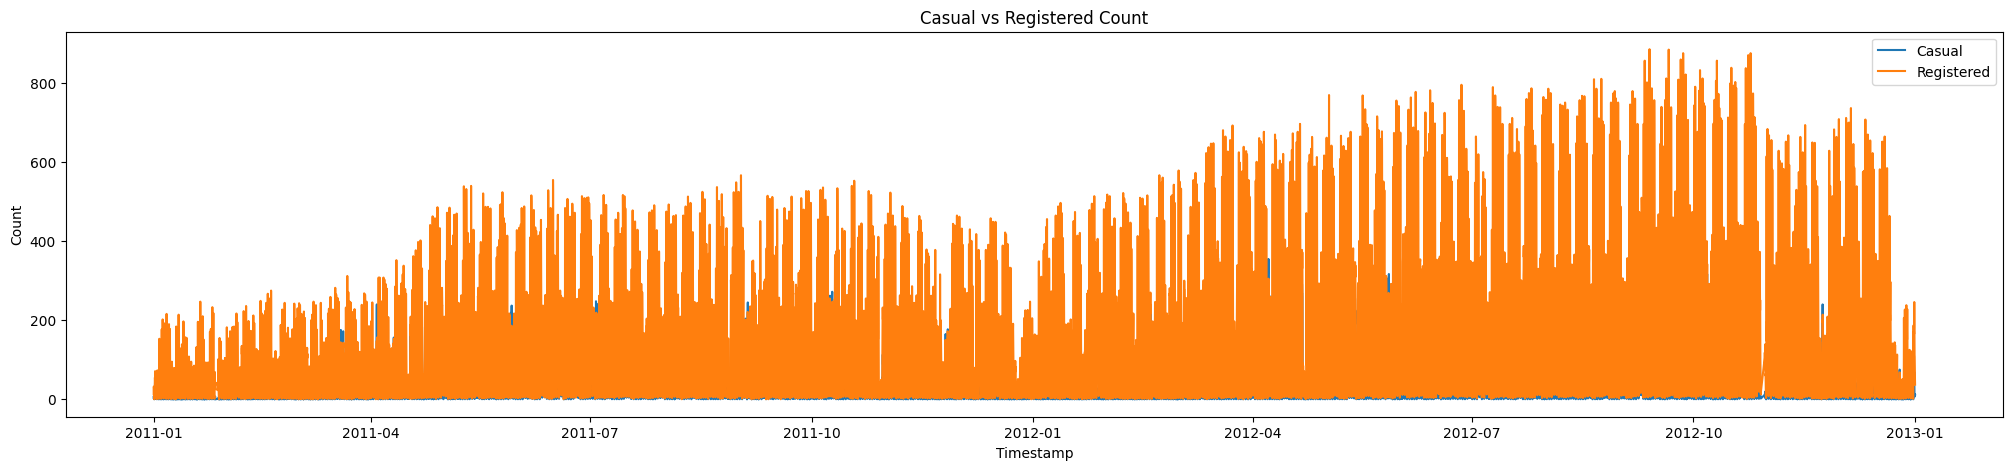

In [32]:
def plot_timestamp(title,size):
    plt.figure(figsize=size)
    plt.plot(hour_df['timestamp'], hour_df['casual'], label='Casual')
    plt.plot(hour_df['timestamp'], hour_df['registered'], label='Registered')
    plt.xlabel('Timestamp')
    plt.ylabel('Count')
    plt.title(title)
    plt.legend()
plot_timestamp('Casual vs Registered Count',(25,5))
plt.show()

Kita akan melakukan zoom-in agar pola lebih terlihat, berikut jika kita melihat dalam satu bulan pertama:

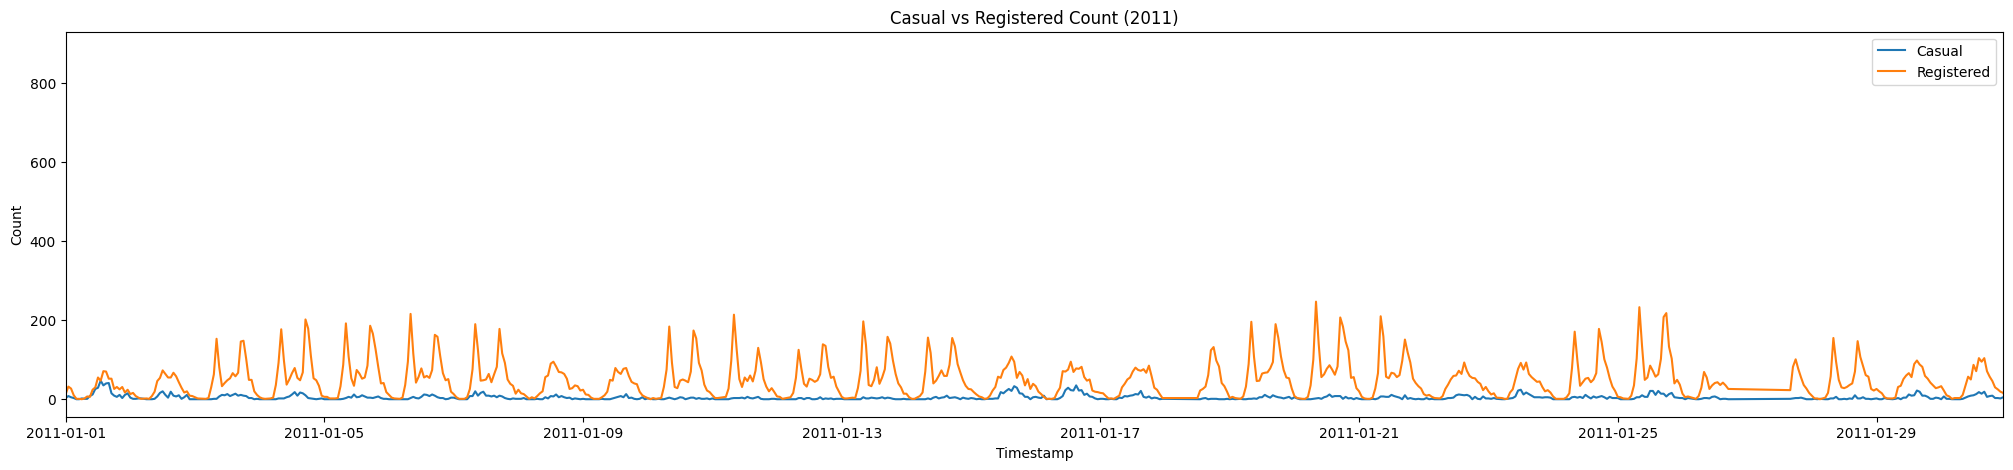

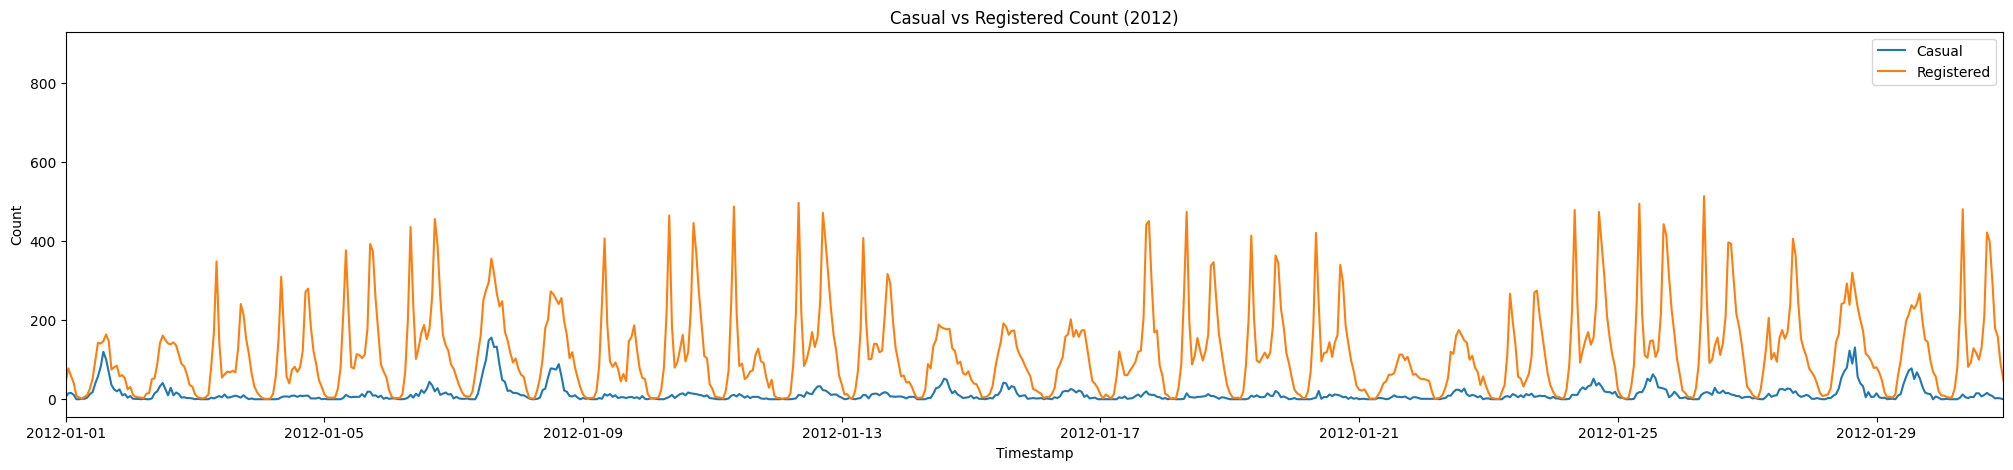

In [33]:
plot_timestamp('Casual vs Registered Count (2011)',(25,5))

start_date = pd.to_datetime('2011-01-01 00:00:00')
end_date = pd.to_datetime('2011-01-30 23:00:00')
plt.xlim(start_date, end_date)

plt.show()

plot_timestamp('Casual vs Registered Count (2012)',(25,5))
start_date = pd.to_datetime('2012-01-01 00:00:00')
end_date = pd.to_datetime('2012-01-30 23:00:00')
plt.xlim(start_date, end_date)

plt.show()

Terlihat pada grafik diatas bahwa terdapat suatu pola yang unik, dimana terdapat waktu saat tidak ada sepeda yang dipinjam, dilanjutkan dengan lonjakan tinggi. Setelah lonjakan tersebut terdapat penurunan dan lonjakan kecil, dilanjutkan dengan lonjakan besar sebelum balik ke titik nol. Berikut adalah cuplikan pada satu lonjakan:

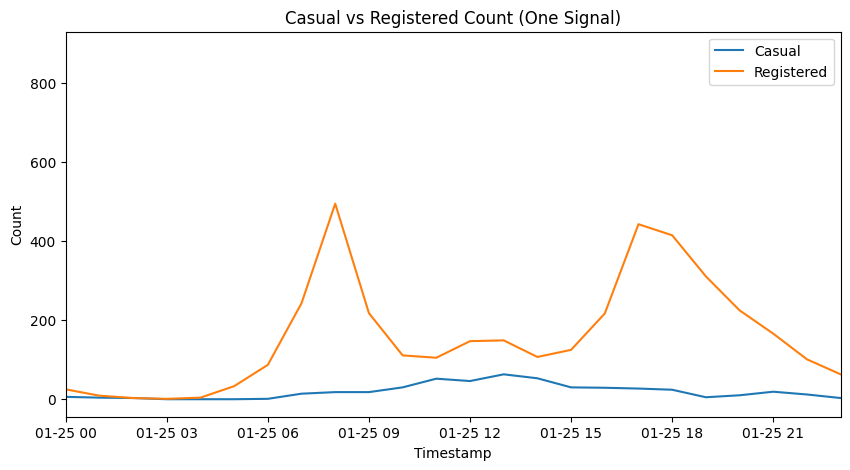

In [34]:
plot_timestamp('Casual vs Registered Count (One Signal)',(10,5))
start_date = pd.to_datetime('2012-01-25 00:00:00')
end_date = pd.to_datetime('2012-01-25 23:00:00')
plt.xlim(start_date, end_date)

plt.show()

Pola ini menunjukan bahwa sebagian besar pengguna meminjam diantara jam 6 hingga 9 pagi, jam 12 hingga 1, dan jam 16 hingga 21. Kesimpulan ini belum menjawab pertanyaan namun dapat menjadi insight tambahan.

Berikut adalah Time Series analysis untuk dataset per hari:

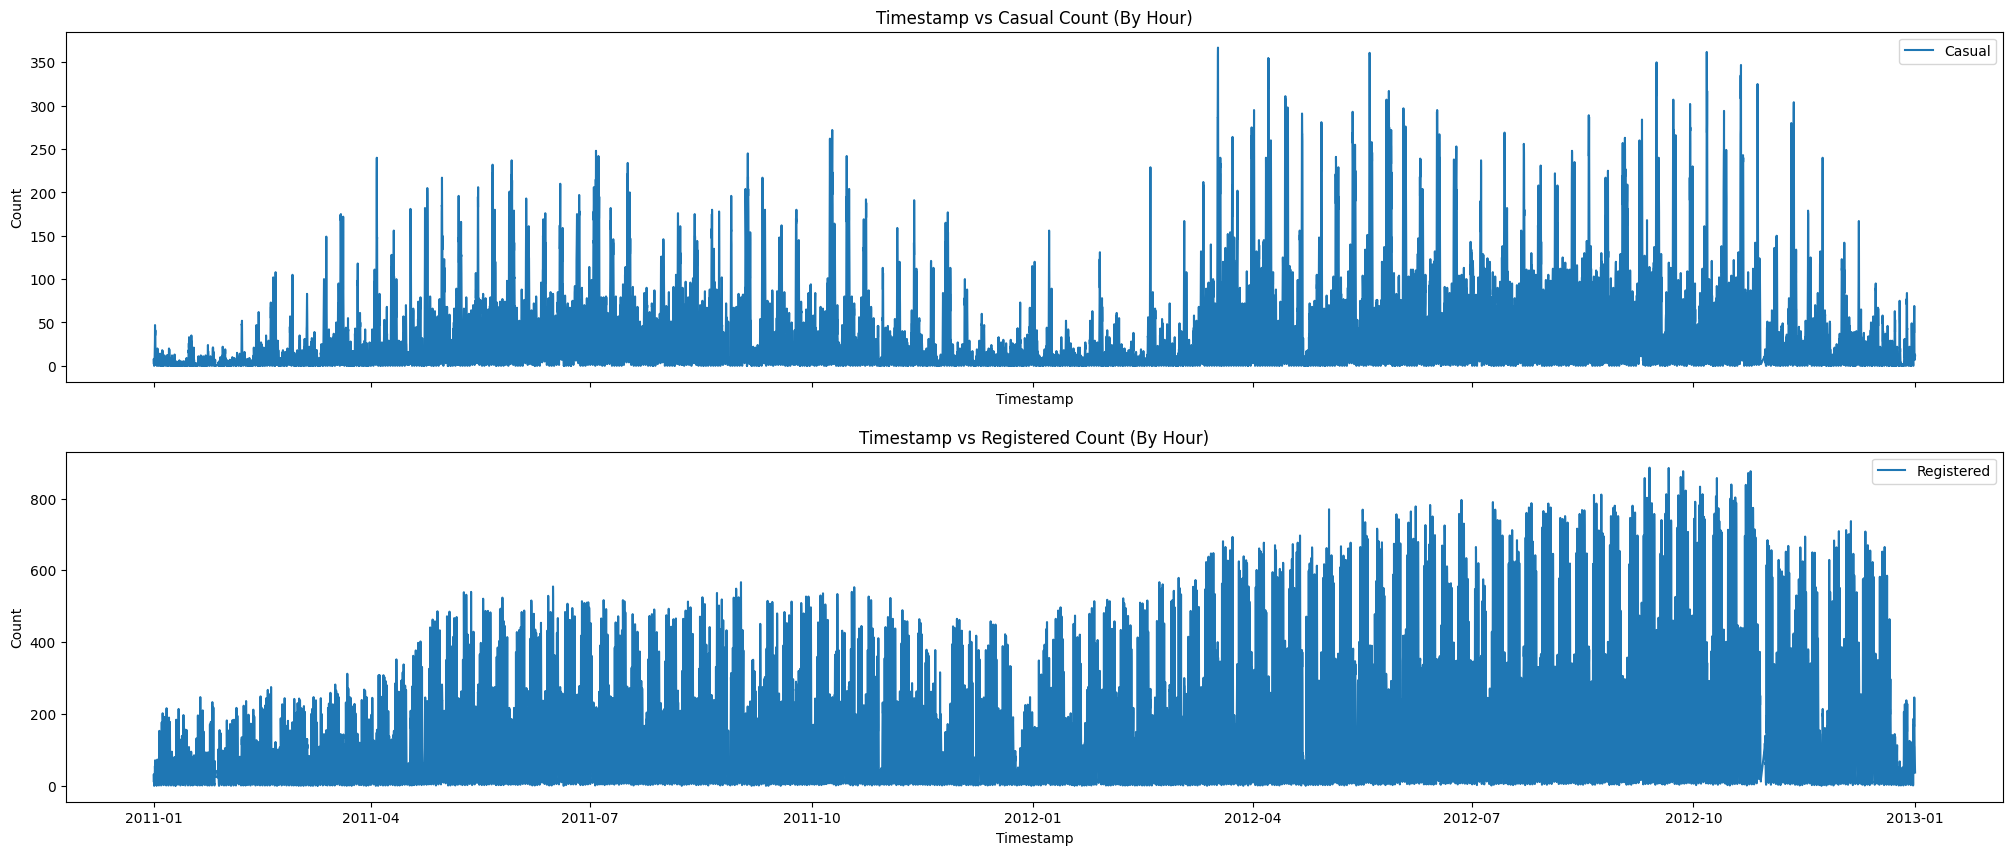

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 10), sharex=True)

ax1.plot(hour_df['timestamp'], hour_df['casual'], label='Casual')
ax2.plot(hour_df['timestamp'], hour_df['registered'], label='Registered')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Count')
ax1.set_title('Timestamp vs Casual Count (By Hour)')

ax2.set_xlabel('Timestamp')
ax2.set_ylabel('Count')
ax2.set_title('Timestamp vs Registered Count (By Hour)')

ax1.legend()
ax2.legend()
plt.show()

#### Pertanyaan 1: Pada musim dan cuaca apa yang paling banyak terjadinya peminjaman?

Untuk menjawabnya kita akan menggunakan Time Series yang sudah di plotting sebelumnya, yang kemudian akan kita pisahkan tiap musim dan kemudian tiap cuaca.
Pada pertanyaan ini kita akan menggunakan dataset per jam dikarenakan cuaca dapat berubah dalam rentang waktu per jam.

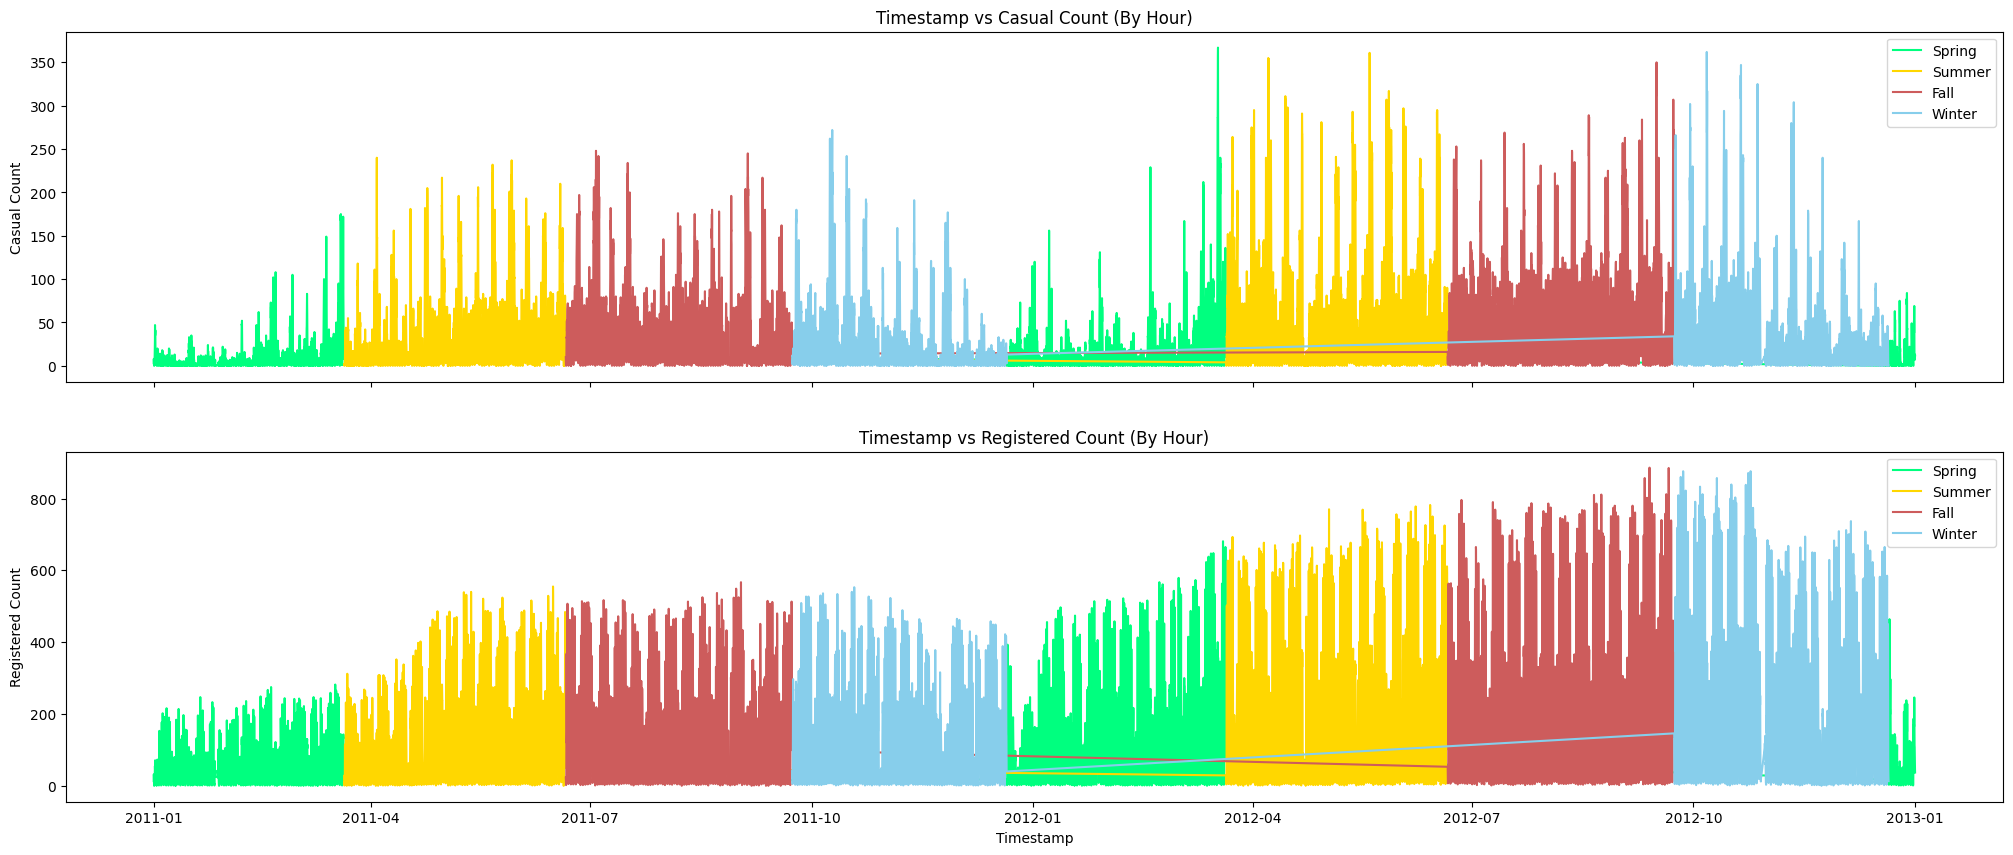

In [36]:
# Mendefinisikan batas musim
season_boundaries = hour_df['season'].unique().tolist()
season_boundaries.sort()

# Mendefinisikan pewarnaan dan label dari tiap musim
season_colors = ['springgreen', 'gold', 'indianred', 'skyblue']
season_labels =['Spring','Summer','Fall','Winter']

# Membuat plot dengan dua subplot, untuk Casual dan Registered
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 10), sharex=True)

# Melakukan plotting untuk tiap musim
for i, season in enumerate(season_boundaries):
    season_data = hour_df[hour_df['season'] == season]
    ax1.plot(season_data['timestamp'], season_data['casual'], label=season_labels[i], color=season_colors[i])
    ax2.plot(season_data['timestamp'], season_data['registered'], label=season_labels[i], color=season_colors[i])


ax1.set_ylabel('Casual Count')
ax2.set_ylabel('Registered Count')
ax2.set_xlabel('Timestamp')
ax1.set_title('Timestamp vs Casual Count (By Hour)')
ax2.set_title('Timestamp vs Registered Count (By Hour)')
ax1.legend()
ax2.legend()

# Show the plot
plt.show()

Pada data diatas kita dapat melihat bahwa jumlah peminjam mengalami kenaikan pada tiga musim pertama (Semi, Panas, dan Gugur), dan mengalami penurunan pada musim Dingin. 

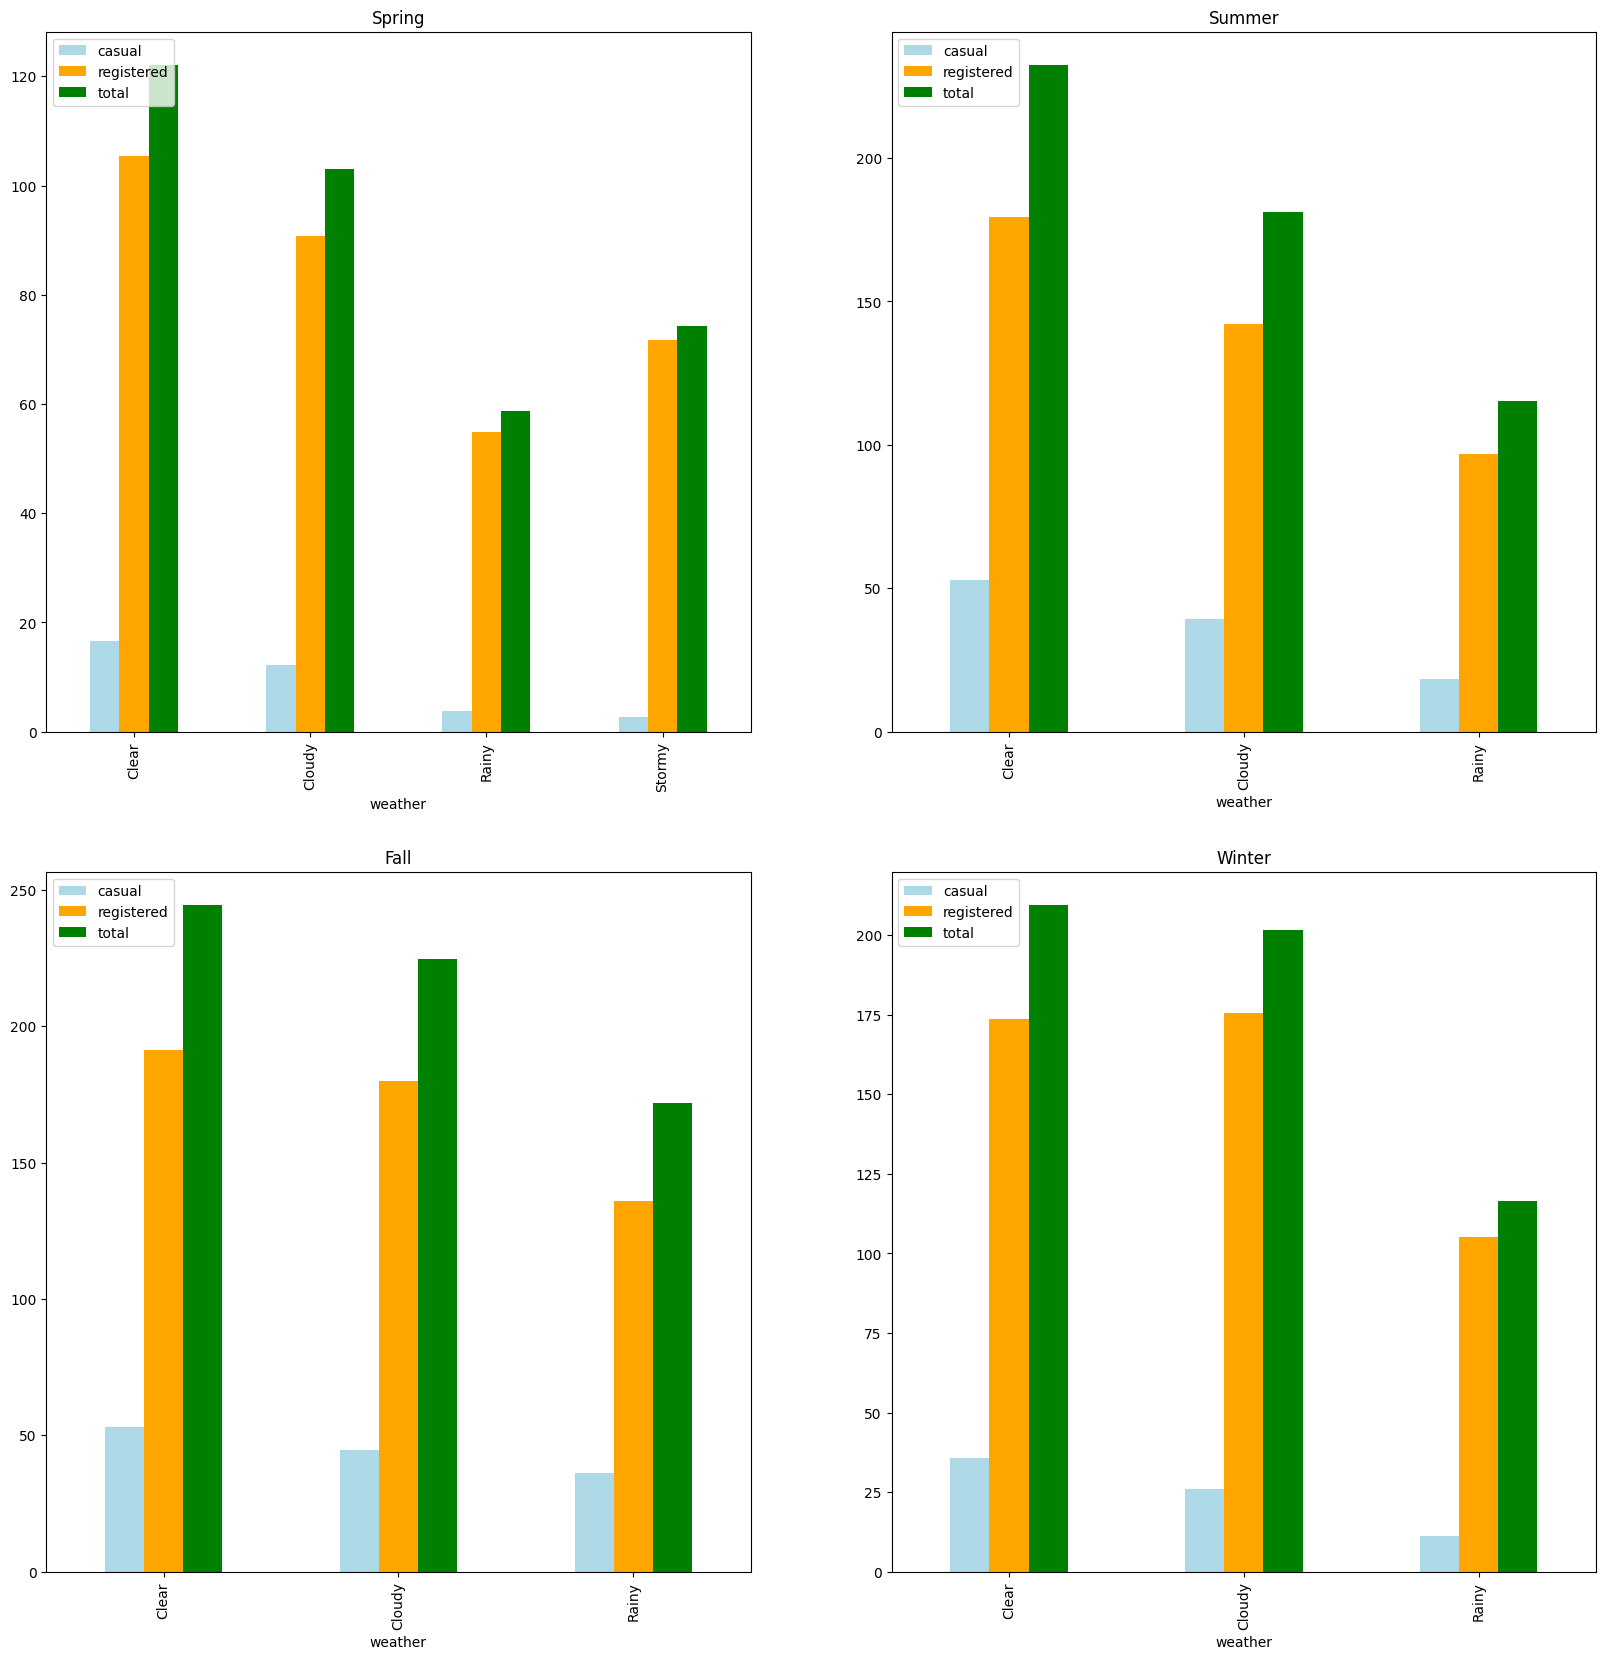

In [37]:
# Membuat label dan dictionary ynag dibutuhkan untuk menkonversikan angka menjadi kata
labels = ['casual', 'registered', 'total']
season_labels = ['Spring','Summer','Fall','Winter']
weather_labels = {1: 'Clear', 2: 'Cloudy', 3: 'Rainy', 4: 'Stormy'}
ride_hr_df['weather'] = ride_hr_df['weather'].replace(weather_labels)

# Melakukan groupby untuk kolom season dan weather untuk menghitung rata-rata data
grouped_weather_season = ride_hr_df.groupby(by=['season','weather']).mean()

# Membuat list warna untuk visualisasi
colors = ['lightblue', 'orange', 'green']

# Membuat plot menggunakan loop for untuk season, dan membuat barchart per season
fig, axes = plt.subplots(2, 2, figsize=(20,20))

for i, season in enumerate(grouped_weather_season.index.levels[0]):
    sub_df = grouped_weather_season.loc[season]
    ax = axes[i//2, i%2]
    sub_df.plot.bar(ax=ax, color=colors)
    ax.set_title(season_labels[season-1])
    ax.legend(loc='upper left')

plt.show()


Berdasarkan plot diatas, terlihat bahwa cuaca yang memiliki paling banyak pengguna pada musim apapun, secara rata-rata total adalah cuaca **Cerah atau Clear**, dan kedua terbanyak adalah **Berawan atau Cloudy**.



season
1    122.055535
2    232.410983
3    244.494207
4    209.463779
Name: total, dtype: float64
season
1    103.074689
2    181.261364
3    224.848997
4    201.483974
Name: total, dtype: float64


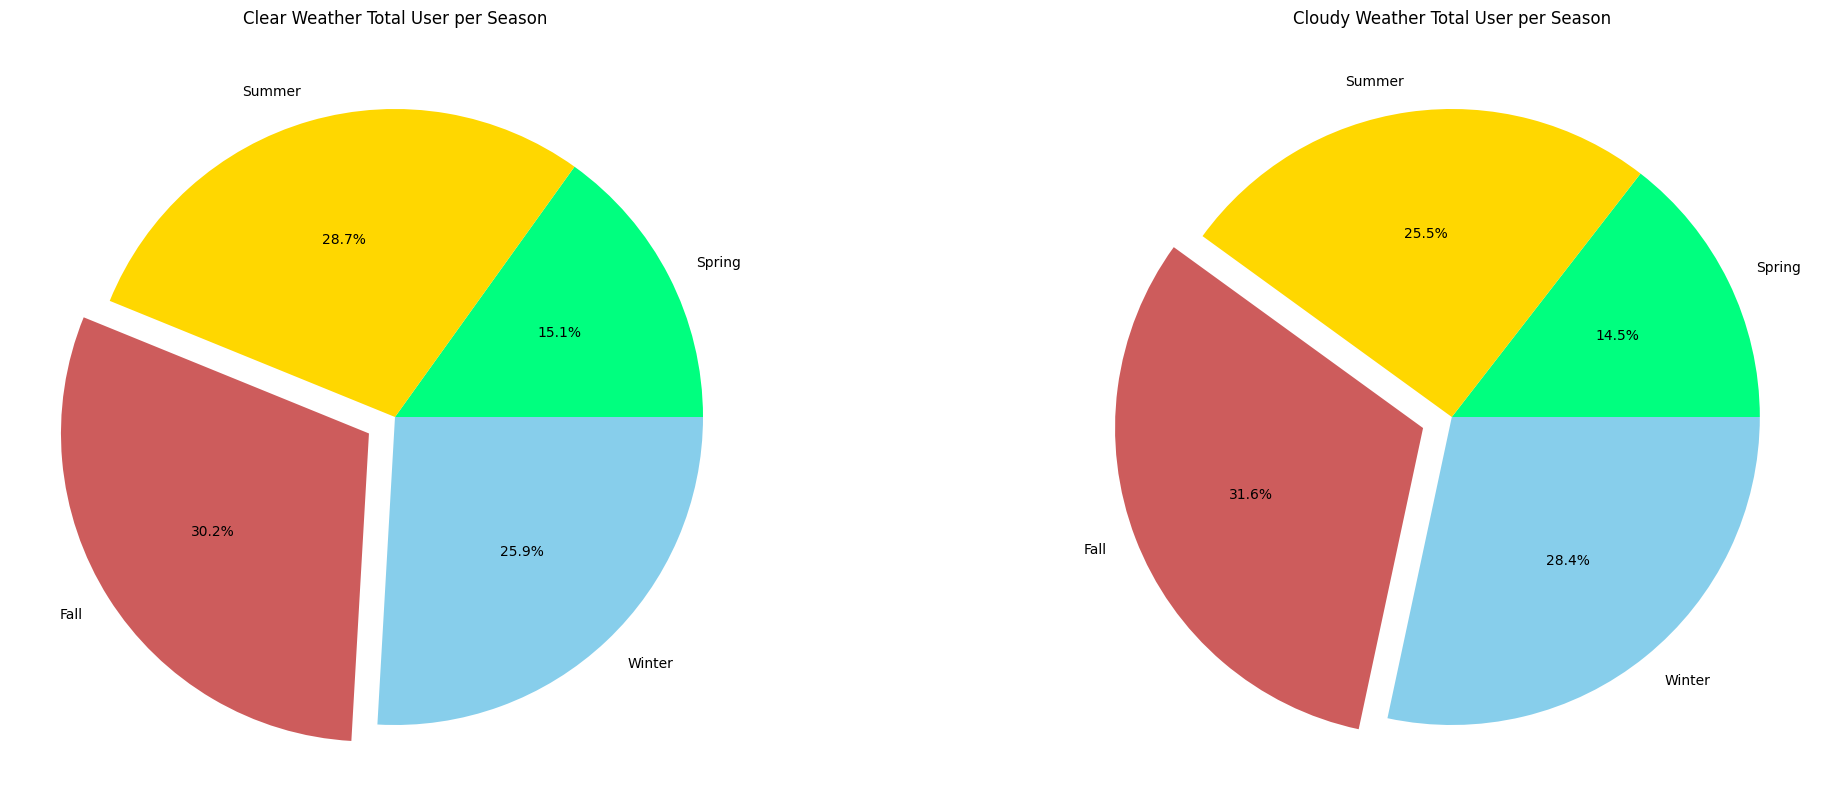

In [38]:
# Melakukan kembali groupbu untuk weather dan season untuk dataset ride_hr_df
grouped_weather_season = ride_hr_df.groupby(by=['weather','season']).mean()

# Membuat plot dengan dua subplot, untuk Clear dan Cloudy
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(25, 10),frameon = True)

clear_weather = grouped_weather_season.loc['Clear']['total']
print (clear_weather)
explode = (0, 0, 0.1, 0)
ax1.pie(x=clear_weather, labels=season_labels,
        autopct='%1.1f%%',
        colors=season_colors,
        explode=explode)
ax1.set_title('Clear Weather Total User per Season')

cloudy_weather = grouped_weather_season.loc['Cloudy']['total']
print (cloudy_weather)
explode = (0, 0, 0.1, 0)
ax2.pie(x=cloudy_weather, labels=season_labels,
        autopct='%1.1f%%',
        colors=season_colors,
        explode=explode)
ax2.set_title('Cloudy Weather Total User per Season')

plt.show()

Dari visualisasi diatas terlihat bahwa pengguna terbanyak ketika pada musim **Gugur atau Fall** untuk kedua cuaca.

- Untuk cuaca **Cerah atau Clear**, pengguna terbanyak kedua ada pada musim **Panas atau Summer**.
- Untuk cuaca **Berawan atau Cloudy**, pengguna terbanyak kedua ada pada musim **Dingin atau Winter**.

#### Pertanyaan 2: Apakah pada hari libur bisa mempengaruhi perbandingan jumlah peminjam antara casual dengan registered?

Kita akan mengambil terlebih dahulu seluruh data antara hari libur dan tidak, serta data pengguna casual dan registered.
Pada pertanyaan ini kita akan menggunakan dataset per hari karena pertanyaan ini berkaitan dengan rentang waktu per hari.

In [39]:
melted_df = ride_day_day.melt(id_vars=['workingday','holiday'],
                    value_vars=['casual','registered','total'],
                    var_name='user_type')
working_day_ride = melted_df.groupby(by=['workingday','user_type']).mean()
working_day_ride = working_day_ride.reset_index()
working_day_ride = working_day_ride.drop('holiday', axis = 1)
holiday_day_ride = melted_df[melted_df['workingday'] == 0].groupby(by=['holiday','user_type']).mean()
holiday_day_ride = holiday_day_ride.reset_index()
print(working_day_ride)
print(holiday_day_ride)

   workingday   user_type        value
0           0      casual  1371.134199
1           0  registered  2959.034632
2           0       total  4330.168831
3           1      casual   606.570000
4           1  registered  3978.250000
5           1       total  4584.820000
   holiday   user_type  workingday        value
0        0      casual         0.0  1401.776190
1        0  registered         0.0  2987.909524
2        0       total         0.0  4389.685714
3        1      casual         0.0  1064.714286
4        1  registered         0.0  2670.285714
5        1       total         0.0  3735.000000


In [40]:
working_day_ride['workingday'] = working_day_ride['workingday'].replace({0:'Not Working',1:'Working'})
holiday_day_ride['holiday'] = holiday_day_ride['holiday'].replace({0:'Non-Holiday',1:'Holiday'})
print(working_day_ride)

    workingday   user_type        value
0  Not Working      casual  1371.134199
1  Not Working  registered  2959.034632
2  Not Working       total  4330.168831
3      Working      casual   606.570000
4      Working  registered  3978.250000
5      Working       total  4584.820000


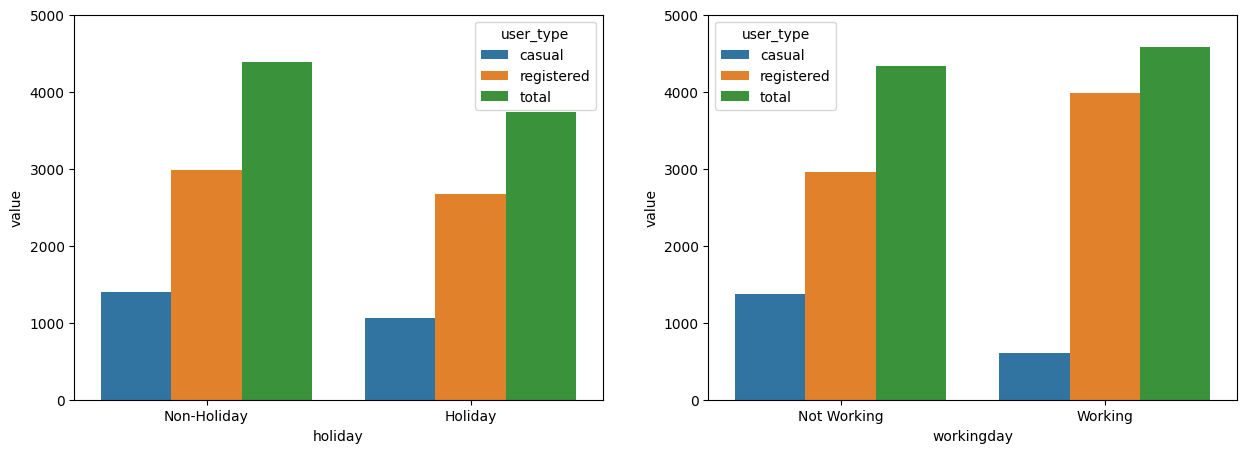

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.set_ylim(0, 5000)
ax2.set_ylim(0, 5000)

sns.barplot(data=working_day_ride, x="workingday", y="value", hue="user_type", errorbar=None, ax=ax2)
sns.barplot(data=holiday_day_ride, x="holiday", y="value", hue="user_type", errorbar=None, ax=ax1)
plt.show()

Dari plot diatas, terlihat bahwa rata-rata total tertinggi adalah pada hari **masuk (Working)**, dan kontribusi terbanyak didapat dari pengguna **registered**.

Dan pada hari **libur (Not Working)**, terlihat bahwa rata-rata total tertinggi adalah ketika libur tersebut **bukan hari raya (Non-Holiday)**.

Rata-rata pengguna **casual** terbanyak ada pada hari **libur (Not Working)** dan **hari raya (Holiday)**.

## Conclusion

- Rata-rata pengguna total terbanyak ketika pada musim **Gugur atau Fall** untuk cuaca **Cerah atau Clear** dan **Berawan atau Cloudy**.
- Untuk cuaca **Cerah atau Clear**, rata-rata pengguna total terbanyak kedua ada pada musim **Panas atau Summer**.
- Untuk cuaca **Berawan atau Cloudy**, rata-rata pengguna total terbanyak kedua ada pada musim **Dingin atau Winter**.
--------------
- Rata-rata total tertinggi adalah pada hari **masuk (Working)**, dan kontribusi terbanyak didapat dari pengguna **registered**.
- pada hari **libur (Not Working)**, terlihat bahwa rata-rata total tertinggi adalah ketika libur tersebut **bukan hari raya (Non-Holiday)**.
- Rata-rata pengguna **casual** terbanyak ada pada hari **libur (Not Working)** dan **hari raya (Holiday)**.

## Convert Data untuk Streamlit

In [42]:
hour_df.to_csv("dashboard/hour_data.csv", index=False)
print(day_df)
zipped_data = list(zip(day_df['dteday'],day_df['workingday'],day_df['holiday'],day_df['casual'],day_df['registered'],day_df['cnt']))
print(zipped_data)
ride_day_day = pd.DataFrame(zipped_data, columns=['timestamp','workingday','holiday','casual','registered','total'])
print(ride_day_day)
melted_df = ride_day_day.melt(id_vars=['timestamp','workingday','holiday'],
                    value_vars=['casual','registered','total'],
                    var_name='user_type')
melted_df.to_csv("dashboard/day_data.csv", index=False)

     instant     dteday  season  yr  mnth  holiday  weekday  workingday   
0          1 2011-01-01       1   0     1        0        6           0  \
1          2 2011-01-01       1   0     1        0        0           0   
2          3 2011-01-01       1   0     1        0        1           1   
3          4 2011-01-01       1   0     1        0        2           1   
4          5 2011-01-01       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
726      727 2011-02-02       1   1    12        0        4           1   
727      728 2011-02-02       1   1    12        0        5           1   
728      729 2011-02-02       1   1    12        0        6           0   
729      730 2011-02-02       1   1    12        0        0           0   
730      731 2011-02-02       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered   
0             2  0.